<a href="https://colab.research.google.com/github/shadmanshakib09/Deep-Learning/blob/main/Deep_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification


In [3]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes = 2, n_clusters_per_class= 1,random_state=41, hypercube= False, class_sep=10)
print(X.shape, y.shape)

(100, 2) (100,)


<Axes: >

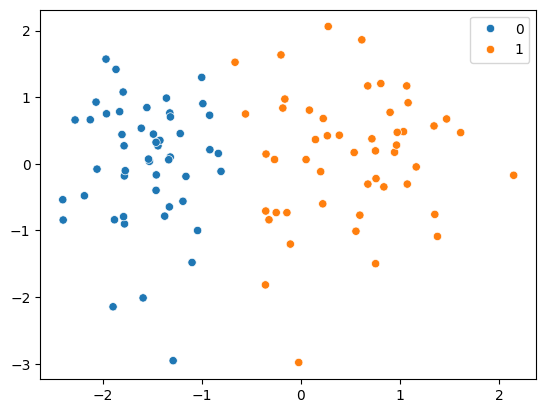

In [4]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


In [13]:
def perceptron(X,y):
  X = np.insert(X,0,1, axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]
  return weights[0], weights[1:]

In [14]:
def step(z):
  if z>0:
    return 1
  else:
    return 0

In [15]:
X.shape[1]

2

In [23]:
step(np.dot(X[1],[1,1]))

0

In [24]:
y[1]

1

In [8]:
intercept, coefficients = perceptron(X,y)

In [9]:
print(intercept, coefficients)

1.0 [1.3042249  0.11497622]


In [10]:

#y=mx+c
m = -(coefficients[0]/coefficients[1])
c = -(intercept/coefficients[1])

In [11]:
m,c

(-11.343431325741216, -8.697450338529146)

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

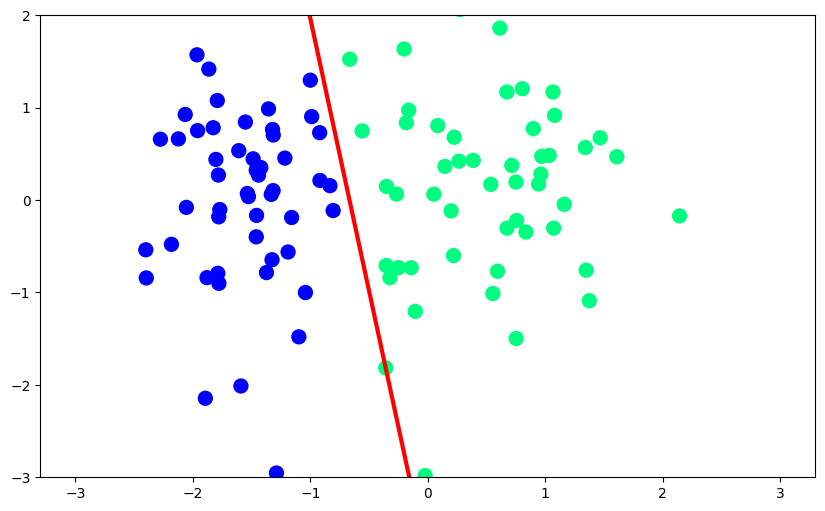

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0],X[:,1], c=y, cmap='winter',s=100)
plt.ylim(-3,2)

In [13]:
#using animation

def perceptron_b(X,y):
  m =[]
  b =[]

  X = np.insert(X,0,1, axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(200):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))
  return m,b

In [14]:
m,b=perceptron_b(X,y)

In [15]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
%matplotlib inline

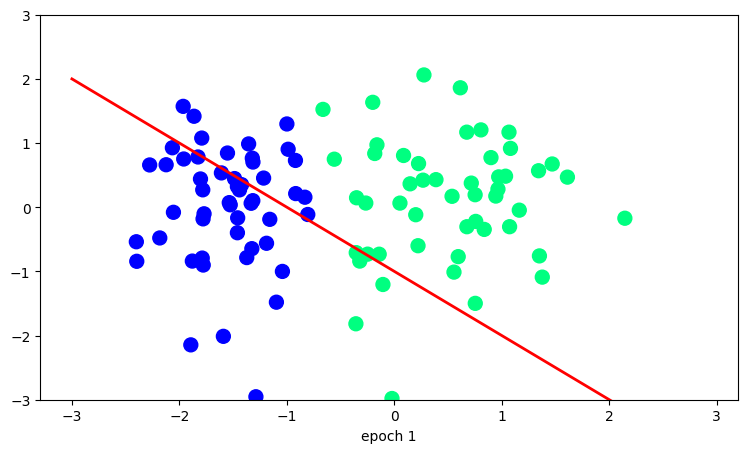

In [16]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * m[0] + b[0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, x_i * m[0] + b[0], 'r-', linewidth=2)  # Note the comma to unpack the single line object
plt.ylim(-3, 3)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * m[i] + b[i])  # Update the line's data
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat = True, frames=200, interval=100)
anim.save('perceptron.gif', writer='imagemagick')